# Match 2D

In [1]:
import numpy as np
import healpy as hp
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import Table, Column
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline

In [2]:
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
k = Table.read('koester2007.vot', format='votable')
print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k)

Reading files


Wen: 132684
Rykoff: 26111
Koester: 13823


In [3]:
# RA e DEC catalogo Wen
#print w['RAJ2000'], w['DEJ2000']

# RA e DEC catalogo Redmapper
#print r['RA'], r['DEC']

# RA e DEC catalogo Koester
#print k['RAJ2000'], k['DEJ2000']

In [4]:
NSIDE = 32

In [5]:
# Phi e theta do Wen
phi_w = np.deg2rad(w['RAJ2000'])
theta_w = np.deg2rad(90.-w['DEJ2000'])

In [6]:
#Phi e theta do Rykoff
phi_r = np.deg2rad(r['RA'])
theta_r = np.deg2rad(90.-r['DEC'])

In [7]:
#Phi e theta do Koester
phi_k = np.deg2rad(k['RAJ2000'])
theta_k = np.deg2rad(90.-k['DEJ2000'])

In [8]:
# Pixels do Wen
wpix = hp.ang2pix(NSIDE, theta_w, phi_w)
n = np.arange(hp.nside2npix(NSIDE))

In [9]:
# Pixels do Rykoff
rpix = hp.ang2pix(NSIDE, theta_r, phi_r)
m = np.arange(hp.nside2npix(NSIDE))

In [10]:
#Pixels do Koester
kpix = hp.ang2pix(NSIDE,theta_k, phi_k)
l = np.arange(hp.nside2npix(NSIDE))

In [11]:
print(hp.get_map_size(m))
print(hp.get_map_size(n))
print(hp.get_map_size(l))

12288
12288
12288


In [12]:
print len(wpix)
print len(rpix)
print len(kpix)

132684
26111
13823


In [13]:
#Retira os numeros de pixels repetidos
wpix = np.unique(wpix)
rpix = np.unique(rpix)
kpix = np.unique(kpix)
print len(wpix)
print len(rpix)
print len(kpix)

4900
3288
2379


In [14]:
# Match de wpix com rpix
lista = []
rp = range(0,len(rpix))
wp = range(0,len(wpix))
for wp in wpix: 
    for rp in rpix:
        if wp==rp:
            lista.append(wp)

In [15]:
print len(lista)

3288


In [16]:
#Match da lista com o kpix
lista_m = []
kp = range(0,len(kpix))
lp = range(0,len(lista))
for lp in lista:
    for kp in kpix:
        if lp==kp:
            lista_m.append(kp)

In [17]:
print len(lista_m)

2311


In [18]:
#sysmap = np.zeros(hp.nside2npix(NSIDE),dtype=np.float32) +hp.UNSEEN
wmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
rmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
kmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
mmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN

In [19]:
wmap[wpix] = 1
rmap[rpix] = 1
kmap[kpix] = 1 
mmap[lista_m] = 1

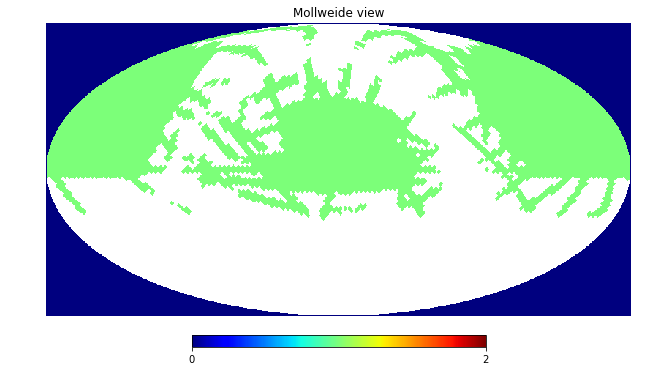

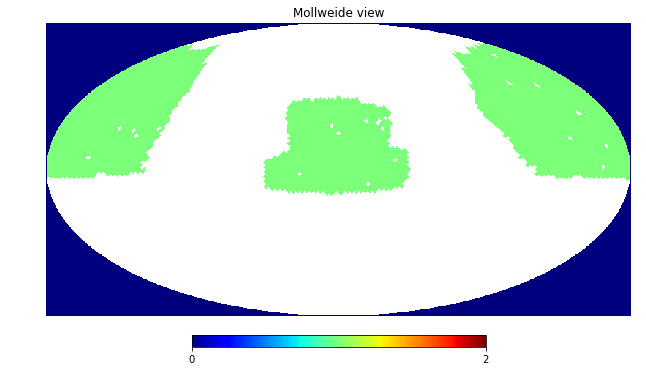

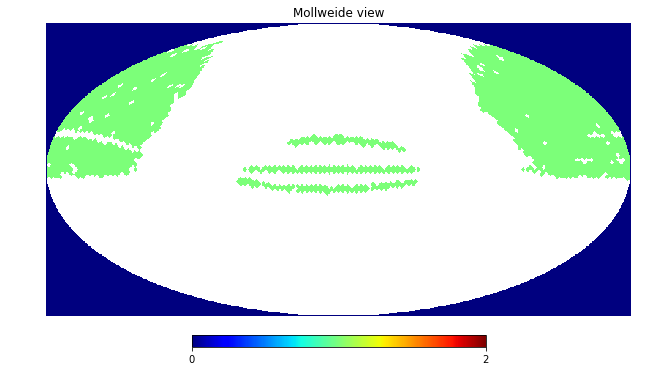

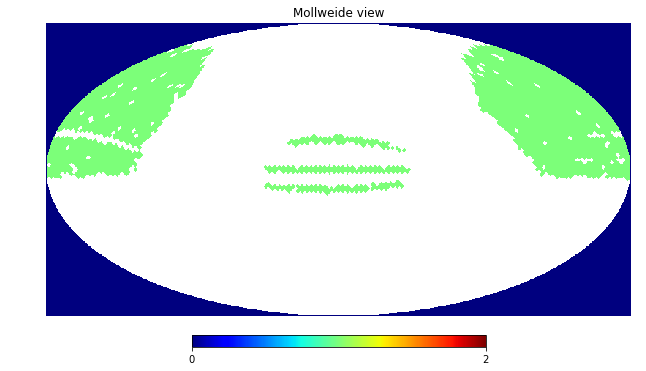

In [20]:
hp.mollview(wmap, fig=1, cmap='jet')
hp.mollview(rmap, fig=2, cmap='jet')
hp.mollview(kmap, fig=3, cmap='jet')
hp.mollview(mmap, fig=4, cmap='jet')

Diagrama de Venn


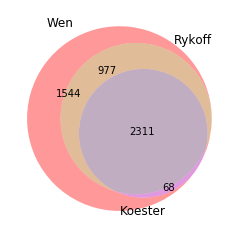

In [21]:
print("\033[43;30mDiagrama de Venn\033[m")
Wen = set(wpix)
Rykoff = set(rpix)
Koester = set(kpix)
venn3([Wen, Rykoff, Koester], ('Wen', 'Rykoff', 'Koester'))
plt.show()

In [22]:
print("\033[43;30mResultados\033[m")
W_R = Wen.intersection(Rykoff)
print len(W_R)

W_K = Wen.intersection(Koester)
print len(W_K)

K_R = Koester.intersection(Rykoff)
print len(K_R)

W_R_K = Wen.intersection(Koester).intersection(Rykoff)
print len(W_R_K)

Resultados
3288
2379
2311
2311


# MATCH 3D

Fazer histograma z dos catalogos.
Fazer o match de um catalogo com o outro. Usando o astropy.

In [166]:
# z do Wen, Rykoff e Koester
z_w = w['zph']
z_r = r['z_lambda']
z_k = k['zph']

In [172]:
# Formatando o Wen para o Diagrama de Venn
wpix = hp.ang2pix(NSIDE, theta_w, phi_w)
n = np.arange(hp.nside2npix(NSIDE))

print("\033[43;30mWen - wpix e z\033[m")
lista_wen = []
for i in range(0,len(wpix)):
    lista_wen.append('%.1f_%.1f'%(wpix[i], z_w[i]))
print len(lista_wen)

Wen - wpix e z
132684


In [173]:
# Formatando o Rykoff para o Diagrama de Venn
rpix = hp.ang2pix(NSIDE, theta_r, phi_r)
n = np.arange(hp.nside2npix(NSIDE))

print("\033[43;30mRykoff - rpix e z\033[m")
lista_rykoff = []
for i in range(0,len(rpix)):
    lista_rykoff.append('%.1f_%.1f'%(rpix[i], z_r[i]))
print len(lista_rykoff)

Rykoff - rpix e z
26111


In [174]:
# Formatando o Koester para o Diagrama de Venn
kpix = hp.ang2pix(NSIDE, theta_k, phi_k)
n = np.arange(hp.nside2npix(NSIDE))

print("\033[43;30mKoester - kpix e z\033[m")
lista_koester = []
for i in range(0,len(kpix)):
    lista_koester.append('%.1f_%.1f'%(kpix[i], z_k[i]))
print len(lista_koester)

Koester - kpix e z
13823


Diagrama de Venn


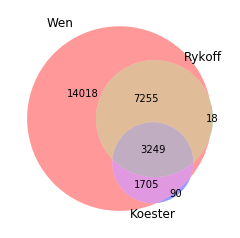

In [175]:
print("\033[43;30mDiagrama de Venn\033[m")
Wen = set(lista_wen)
Rykoff = set(lista_rykoff)
Koester = set(lista_koester)
venn3([Wen, Rykoff, Koester], ('Wen', 'Rykoff', 'Koester'))
plt.show()